In [1]:
import pyemma
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import numpy as np
from glob import glob

In [4]:
pdb_file = "/Volumes/DATA/MSM_Zuckerman/chignolin/chig_pdb_166.pdb"

In [5]:
traj_files = sorted(glob("/Volumes/DATA/MSM_Zuckerman/chignolin/*.dcd"))

In [6]:
features = pyemma.coordinates.featurizer(pdb_file)
features.add_residue_mindist()
source = pyemma.coordinates.source([traj_files], features=features, chunk_size=10000)
X = source.get_output()

20-06-18 20:58:11 pyemma.coordinates.data.featurization.featurizer.MDFeaturizer[0] WARNING  Using all residue pairs with schemes like closest or closest-heavy is very time consuming. Consider reducing the residue pairs


<ipython-input-6-9a1506e8de43>:3: PyEMMA_DeprecationWarning: Passed deprecated argument "chunk_size", please use "chunksize"
  source = pyemma.coordinates.source([traj_files], features=features, chunk_size=10000)


HBox(children=(HBox(children=(Label(value='getting output of FragmentedTrajectoryReader'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=54), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [7]:
# top model is commute, tica lag 5 frames, 21 tics, 600 microstates, msm lag 250 frames

In [19]:
tica = pyemma.coordinates.tica(X, lag=5, dim=21, kinetic_map=False, commute_map=True)

In [20]:
tica.ndim

21

In [23]:
(np.cumsum(tica.timescales)/np.sum(tica.timescales))[20]

0.95285156071076627

In [24]:
Y = tica.get_output()

In [25]:
kmeans = pyemma.coordinates.cluster_kmeans(Y, k=600, max_iter=1000)

HBox(children=(HBox(children=(Label(value='initialize kmeans++ centers'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=600), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

HBox(children=(HBox(children=(Label(value='kmeans iterations'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=1000), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

20-06-18 21:11:02 pyemma.coordinates.clustering.kmeans.KmeansClustering[17] INFO     Cluster centers converged after 3 steps.


In [26]:
dtrajs = kmeans.dtrajs

In [29]:
np.save('chignolin_dtrajs_lag50ns', dtrajs)

In [4]:
dtrajs = list(np.load('chignolin_dtrajs_lag50ns.npy'))

In [8]:
its = pyemma.msm.its(dtrajs, 2000, errors='bayes', n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=19), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

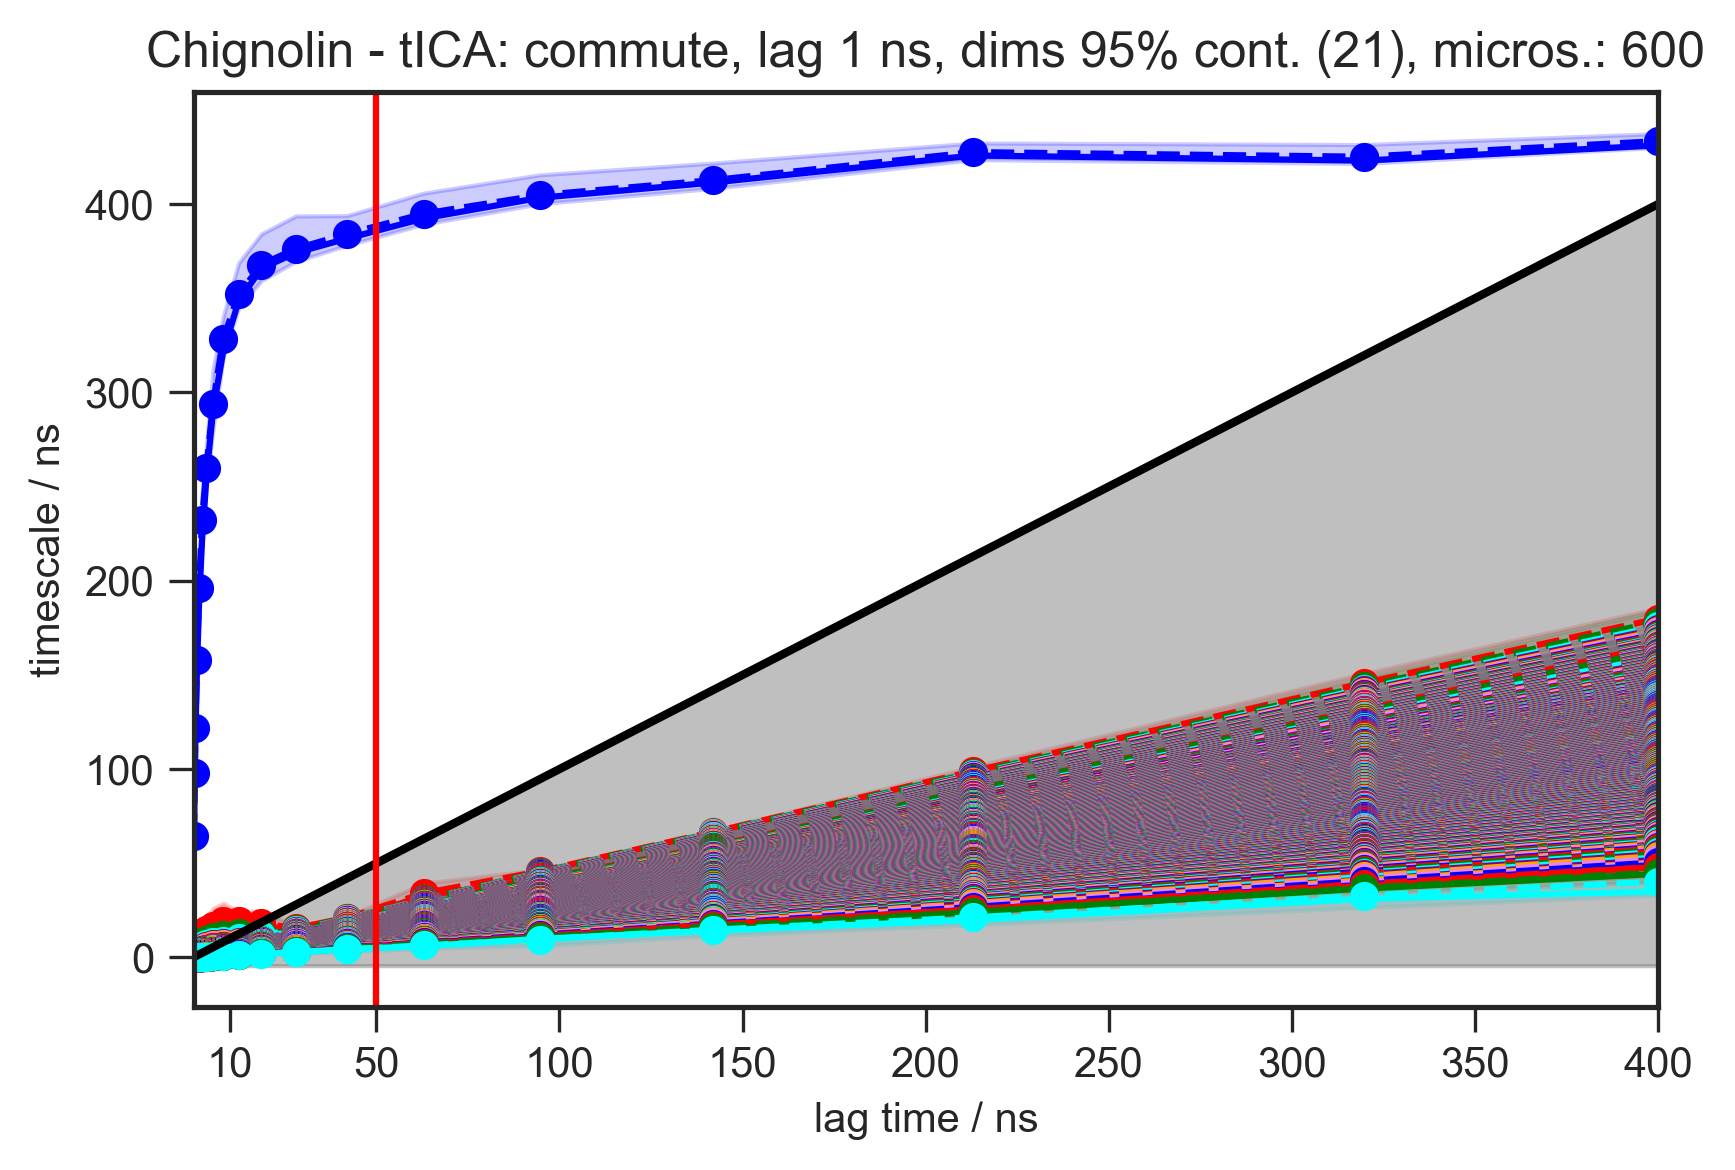

In [9]:
plt.figure(dpi=300)
pyemma.plots.plot_implied_timescales(its, ylog=False, dt=0.2, units='ns')
plt.axvline(50, c='red')
plt.title('Chignolin - tICA: commute, lag 1 ns, dims 95% cont. (21), micros.: 600')
plt.xticks([10,50,100,150,200,250,300,350,400])
plt.tight_layout()
plt.savefig('chignolin_its_50ns.png', dpi=300)
plt.savefig('chignolin_its_50ns.pdf')

In [10]:
# CK-test

In [3]:
# lag 10 ns

In [3]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 50)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [4]:
ck_test = bmsm.cktest(2, err_est=True, mlags=(np.arange(10) * (200/10)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

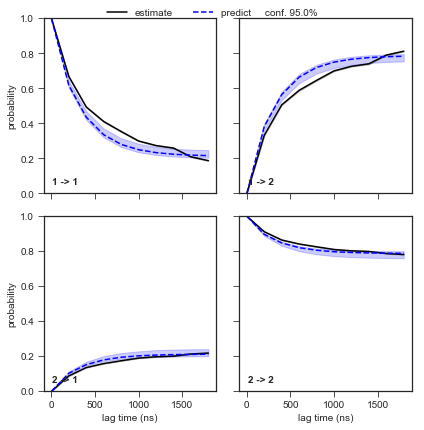

In [5]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('chignolin_cktest_lag10ns_outto1800ns.png', dpi=300)
plt.savefig('chignolin_cktest_lag10ns_outto1800ns.pdf')

In [6]:
# lag 50 ns

In [7]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 250)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [8]:
ck_test = bmsm.cktest(2, err_est=True, mlags=(np.arange(10) * (200/50)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

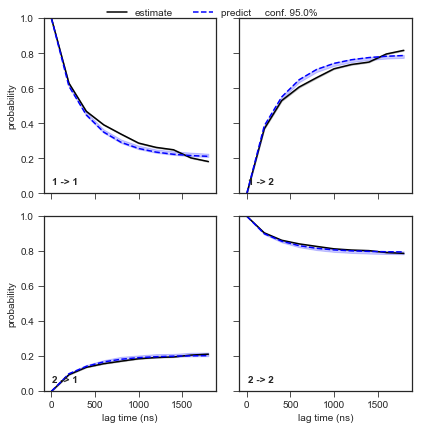

In [9]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('chignolin_cktest_lag50ns_outto1800ns.png', dpi=300)
plt.savefig('chignolin_cktest_lag50ns_outto1800ns.pdf')

In [10]:
# lag 100 ns

In [11]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 500)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [12]:
ck_test = bmsm.cktest(2, err_est=True, mlags=(np.arange(10) * (200/100)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

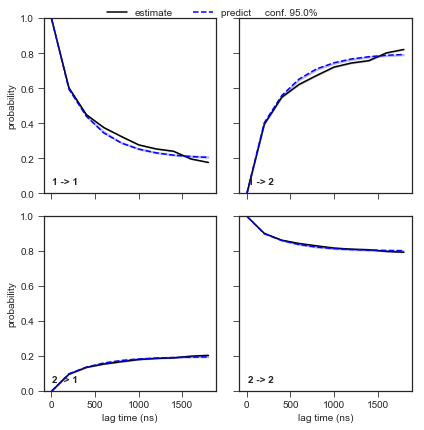

In [13]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('chignolin_cktest_lag100ns_outto1800ns.png', dpi=300)
plt.savefig('chignolin_cktest_lag100ns_outto1800ns.pdf')

In [2]:
# lag 150 ns

In [5]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 750)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [6]:
ck_test = bmsm.cktest(2, err_est=True, mlags=(np.arange(10) * (200/150)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

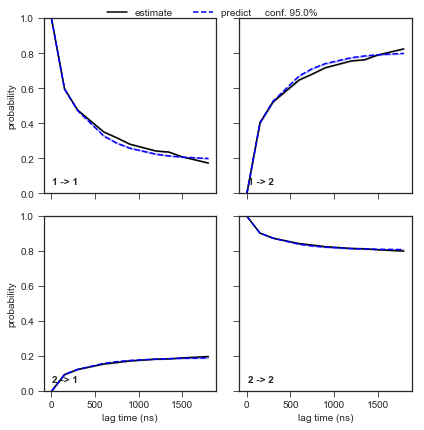

In [7]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('chignolin_cktest_lag150ns_outto1800ns.png', dpi=300)
plt.savefig('chignolin_cktest_lag150ns_outto1800ns.pdf')

In [8]:
# lag 200 ns

In [9]:
bmsm = pyemma.msm.bayesian_markov_model(dtrajs, 1000)

HBox(children=(HBox(children=(Label(value='Sampling MSMs'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

In [10]:
ck_test = bmsm.cktest(2, err_est=True, mlags=(np.arange(10) * (200/200)).astype('int'), n_jobs=8)

HBox(children=(HBox(children=(Label(value='estimating BayesianMSM'),), layout=Layout(max_width='35%', min_width='35%')), HBox(children=(IntProgress(value=0, max=9), HTML(value='')), layout=Layout(padding='0 0 0 20px'))), layout=Layout(display='flex', width='100%'))

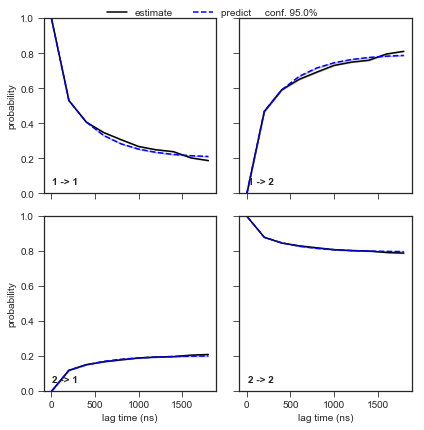

In [11]:
plt.figure()
pyemma.plots.plot_cktest(ck_test, units='ns', dt=0.2)
plt.tight_layout()
plt.savefig('chignolin_cktest_lag200ns_outto1800ns.png', dpi=300)
plt.savefig('chignolin_cktest_lag200ns_outto1800ns.pdf')

In [ ]:
# now top model from scoring with only 2 eigenvalues

In [ ]:
## SAME TOP MODEL